# 3. 분류
## 3-1 MNIST

- MNIST는 약 숫자를 손글씨로 적은 이미지 70,000장의 대규묘 데이터셋으로 각 이미지마다 labeling이 되어있다.

- 사이킷런에서 해당 데이터를 제공하는데, 사이킷런에서 제공하는 데이터들은 기본적으로 아래와 같은 딕셔너리 구조로 저장되어있다. 그리고 기본적으로 비정형데이터인 이미지들의 픽셀값을 갖고 정형 데이터로 만들어준 거 같다.
    
    - 데이터셋 설명 : DESCR
    
    - 샘플이 하나의 행,feature가 하나의 열로 구성된 배열을 가진 data 키
    
    - label을 담은 target키

In [2]:
# 사이킷런에서 mnist 데이터 다운로드 받기

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X,y = mnist['data'],mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [10]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


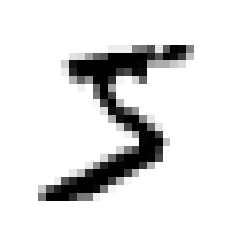

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.loc[0,:].to_numpy() # dataframe 형태로 주는 거로 바뀐거 같다.
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [15]:
# 위 그림의 label
y[0]

'5'

In [17]:
# 현재 위처럼 label이 기본적으로 문자열로 되어있으나 머신러닝 알고리즘에서는 대부분 숫자가 필요하므로 형변환 진행.
import pandas as pd
import numpy as np
y = y.astype(np.uint8)

In [18]:
# 6:1로 train test 분리
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 3.2 이진분류기 훈련

In [20]:
# 5인지 아닌지 True/False로 분류하는 label을 생성
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [21]:
# SGDClassifier
# 확률적 경사하강법 분류기는 큰 데이터셋을 효율적으로 처리하는 장점을 지님.
# 한번에 하나씩 훈련 샘ㅍ르을 독립적으로 처리하는 미니 배치 학습.
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) # randomstate로 seed 고정하여 재현
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [22]:
sgd_clf.predict([some_digit])

C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## 3.3 성능 측정

- 분류의 평가는 회귀 모델보다 훨씬 어렵고, 상황에 맞는 평가지표를 잘 설정해야 한다.

In [26]:
# valid data로 교차검증을 사용한 정확도 측정

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# shuffle이 false이면 random_state의 효과가 없으므로 shuffle 은 True로 변경
skfolds = StratifiedKFold(n_splits = 3, random_state = 42,shuffle = True)

# train 데이터를 3_fold로 나누어 valid set 생성
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) # 모델을 복사
    X_train_folds = X_train.loc[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.loc[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    

0.9669
0.91625
0.96785


In [28]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv = 3,scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [29]:
# 모든 데이터를 5가 아니라고 분류하는 분류기 생성.
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [30]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

- 위를 보면 정확도가 굉장히 높게 나왔으나 그 이유는 5를 가진 숫자들이 얼마 없는 **불균형한 데이터셋**이기 때문이다. 그러므로 정확도로 모델을 평가하는 것은 적절치 못하다고 볼 수 있다

## 3.3.2 오차행렬

- 검증 방법외에 오차행렬을 조사하는 것도 하나의 방법이다.기본적인 아이디어는 클래스 A의 샘플이 잘못된 클래스로 분류된 횟수를 세는 것.

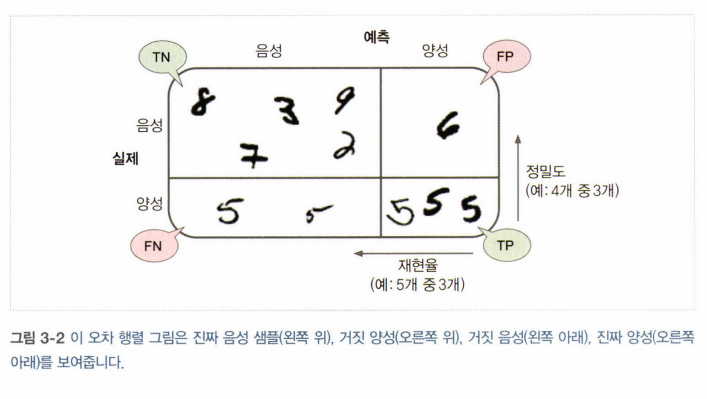

- (1,1) : TN -> 실제로 0. 예측도 0


- (1,2) : FP -> 실제로 0, 예측은 1


- (2,1) : FN -> 실제로 1, 예측은 0


- (2,2) : TP -> 실제로 1, 예측도 1


- 정밀도(precision) : 1로 예측한 것 중에 맞은 비율.


- 재현율(recall) or 민감도 or TPR : 1인 것들 중에서 1로 예측한 비율.

    - 일반적으로 정밀도는 재현율과 같이 사용해야 정확한 정도를 알 수 있다. -> F1 score
    
    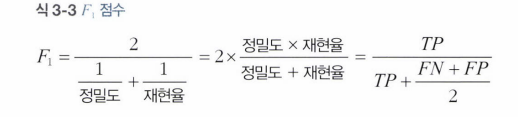

In [31]:
# 오차 행렬을 만들기 위해서는 먼저 예측값을 만들어야함.
# 검증 데이터셋으로 예측값을 생성. -> test값은 무조건 최종에만 사용.

# cross_val_score 는 평가점수를 반환하지만 predict는 얻은 예측을 반환한다.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3)

In [32]:
# 오차 행렬 생성
# 행은 실제 클래스, 열은 예측한 클래스를 나타냄
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [33]:
#정밀도
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [34]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [35]:
# f1_score
# 정밀도와 재현율이 비슷하면 f1 점수가 높지만 상황에 따라서 정밀도와 재현율 각각이 중요한 문제가 있음.
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

## 3.3.4 정밀도/재현율 트레이드오프

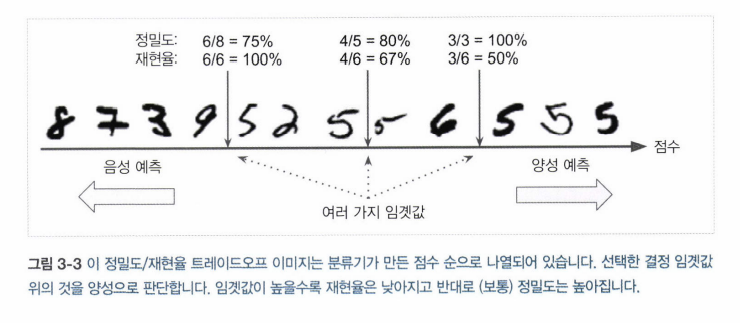

- SGDClassifier는 결정 함수(decision function)을 사용하여 각 샘플의 점수를 계산하고, 이를 통해 임계값보다 크면 샘플을 positive로 아니면 negative로 분류한다.

    - 임계값이 높을수록 일반적으로 재현율은 낮아지고, 정밀도는 높아진다. 반대로 낮을수록 재현율은 높아지고, 정밀도는 낮아진다.

In [36]:
# decision_function으로 각 샘플의 점수를 알 수 있음
y_scores = sgd_clf.decision_function([some_digit])
y_scores

C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [38]:
# 임계값을 설정
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [39]:
# 만약 threshold를 높인다면? 
# 임계값을 못 넘었기 때문에 False로 판단
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [40]:
# 적절한 임계값을 결정하는 방법은?
# 먼저 cv로 모든 샘플의 결정 점수를 받도록 지정. -> predict_proba로 받아야함.
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function") # method = 'decision_function'

# 사실 predict()도 decision_function()함수를 사용하여 0보다 큰 경우를 positive로 분류

# 점수를 구했다면 가능한 모든 임계값에 대해 정밀도와 재현율을 구할 수 있다.
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [42]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

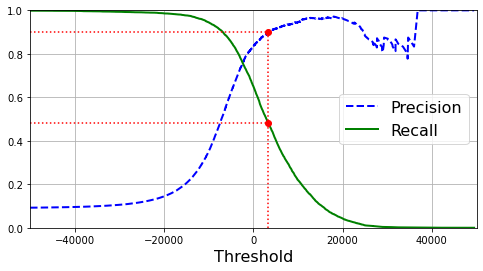

In [41]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
bbbplt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown                                        # Not shown
plt.show()

- 정밀도 끝이 울퉁불퉁한데 이유는 임계값을 올리더라도 가끔 낮아질 때가 있기 때문임. 보통은 올라가는게 이론적이긴함.반면에 재현율은 임계값이 올라감에 따라 줄어들 수 밖에 없음.

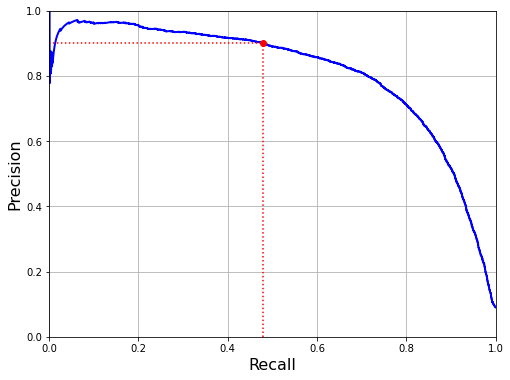

In [43]:
# 트레이드 오프를 확인하기 위해서는 재현율과 정밀도의 곡선을 그리는 것
# 이를 보아서 정밀도가 급격하게 줄어드는 하강점 직전을 트레이드 오프로 지정.

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [45]:
# np.argmax로 인덱스를 반환하여 정확환 threshold를 찾을 수 있음.
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [46]:
# 정밀도 90이 되는 지점의 threshold로 설정
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [47]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [48]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## 3.3.5 ROC  곡선

- 정밀도 / 재현율 곡선이 아니라 **FPR(거짓 양성의 비율) / TPR(진짜 양성의 비율) == Recall(재현율)**의 곡선임 


- 일반적으로 여기에도 트레이드오프가 있는데 TPR이 높을수록 FPR도 높아진다.

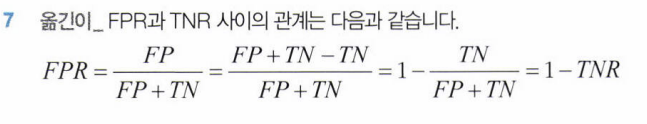

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

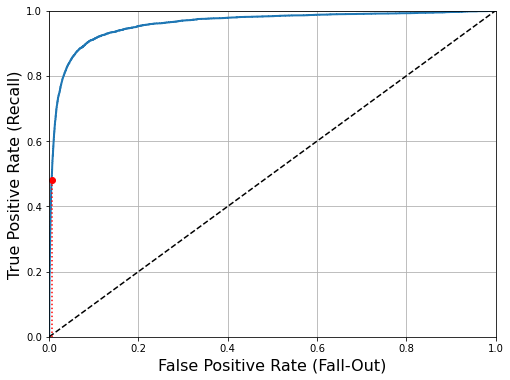

In [50]:
# 대각 점선은 완전한 랜덤 분류기의 ROC 곡선을 뜻함. 좋은 분류기는 이 점선에서 거리가 가장 멀어야 함(왼쪽 위 모서리)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")                              
plt.show()

In [51]:
# 이를 위해서는 곡선아래의 면적 AUC를 측정하면 된다.
# 완벽한 분류기는 1이고 랜덤한 분류기는 0.5이다.
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [52]:
# 랜덤 포레스트로 
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [53]:
# positive가 될 확률을 전달해주어야함.
y_scores_forest = y_probas_forest[:, 1] # 점수 = 양성 클래스의 확률
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [55]:
# roc_auc_score가 SGD보다 더 좋다.
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

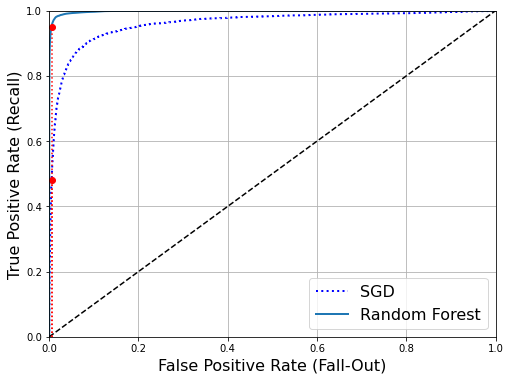

In [54]:
# random_forest의 roc curve가 왼쪽 위 모서리에 더 가까우므로 더 좋다.
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

## 3.4 다중 분류

- 지금까지 위에서는 두 개의 클래스를 분류하는 이진 분류기였으나, 여러개의 클래스를 분류할 수 있는 다중 분류 문제들이 더 많다.<p>

    - SVM이나 Logistic regression은 이진 분류만 가능. 이진 분류기를 여러개를 사용해 다중 클래스를 분류하는 기법도 있음.<p>
    
        - OvR or OvA: 예를 들어 10개의 클래스를 구분해야한다면 각 클래스별로 이진분류를 하게 만들어 각 결정 점수가 가장 높은 것을 클래스로 선택해도 됨.<p>
    
        - OvO : 각 클래스의 **조합**마다 이진 분류기를 훈련 0과1 , 0과2 ...<p>
            
   - svm 같은 경우 작은 훈련 세트에서 많은 분류기를 훈련시키는 쪽이 빨라 OvO를 선호하지만 대부분의 이진 분류 알고리즘에서는 OvR을 선호한다. 
            
            cf)  liblinear 라이브러리를 사용하는 LinearSVC는 기본적으로 OvR 전략을 사용. 그러나 SVC 클래스가 시용히는 libsvm 라이브러리는 OvO사용. 
            

            
    
            

In [56]:
# 다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 알아서 OvR 이나 OvO를 알아서 적용.
# SVC는 OvO를 적용
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train_5이 아니라 y_train입니다
svm_clf.predict([some_digit])

C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [57]:
# 확인해보면 정말로 10개 클래스에 대한 이진 분류 결정 함수들이 저장되어 있음
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [58]:
print(np.argmax(some_digit_scores))
print(svm_clf.classes_) # 분류기가 훈련될 때 classes_속성에 타겟 클래스의 리스트를 값으로 정렬해 저장함.
# 정렬해서 저장하므로 mnist에서는 각 인덱스의 값이 클래스의 라벨과 같다.
print(svm_clf.classes_[5])

5
[0 1 2 3 4 5 6 7 8 9]
5


In [59]:
# OvO나 OvR 사용을 강제하는 방법
# OvR을 사용하는 SVC로 강제
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

array([5], dtype=uint8)

In [60]:
# sgd는 다중 클래스 분류를 할 수 있으므로 해당 클래스마다의 결정점수를 찾을 수 있음. 
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])
sgd_clf.decision_function([some_digit])

C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

## 3.5 에러 분석

In [62]:
# 먼저 오차함수 confusion_matrix()를 사용하여 생성.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

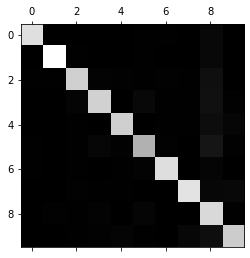

In [64]:
# 주대각선이 해당 클래스를 정확하게 예측한것인데 이를 보면 현재 분류기가 잘 예측한것으로 볼 수 있다.
plt.matshow(conf_mx,cmap = plt.cm.gray)
plt.show()

- 좋지 못한 분류기의 confusion marix 
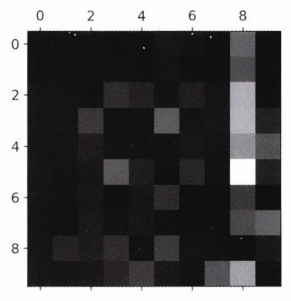

- SGD Classifier의 경우 선형 모델인데, 선형 분류기는 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 대해 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산하기 때문에 3과 5의 경우 몇개의 픽셀만 다르기 때문에 쉽게 혼동할 수 있다. <p>
    
    - 3과 5를 잘 구분하게 하려면 이미지를 중앙에 위치시키고, 회전되어 있지 않도록 전처리 하는 방법이 있다.

## 3.6  다중 레이블 분류

- **각 샘플이 하나의 클래스에만 할당되는게 아니라 여러개의 클래스에 할당되는 것** -> **여러개의 이진 꼬리표를 출력**


- 평가할 때는 모든 레이블에 대한 F1 score의 평균을 계산하는 등 많은 방법들이 있다. 


In [66]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] # 1차원을 2차원 배열로

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [68]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [67]:
knn_clf.predict([some_digit])

C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

## 3.7 다중 출력 분류

- 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화 한 것.

In [69]:
# 이미지 잡음 제거하는 시스템도 하나의 다중 출력 분류임
# 분류기의 출력이 각 픽셀마다 0~255마다 여러개의 값을 가질 수 있으므로 이는 다중 출력 분류문제임.\
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

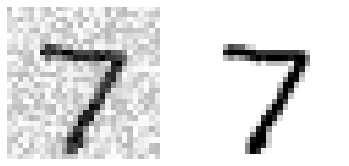

In [77]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
some_index = 0
plt.subplot(121); plot_digit(X_test_mod.iloc[some_index].to_numpy())
plt.subplot(122); plot_digit(y_test_mod.iloc[some_index].to_numpy())
plt.show()

C:\Users\inuya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


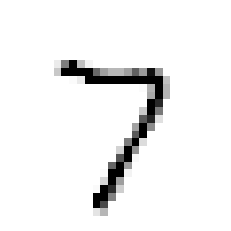

In [79]:
knn_clf.fit(X_train_mod, y_train_mod) # 깨끗한 이미지의 픽셀값들을 라벨로 학습
clean_digit = knn_clf.predict([X_test_mod.iloc[some_index]])
plot_digit(clean_digit)